# Установка модулей и библиотек

In [1]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.3.1
asttokens               3.0.0
astunparse              1.6.3
certifi                 2025.8.3
charset-normalizer      3.4.3
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
filelock                3.19.1
flatbuffers             25.9.23
fonttools               4.60.0
fsspec                  2025.9.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.75.1
h5py                    3.14.0
idna                    3.10
ipykernel               6.30.1
ipython                 9.5.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.2
jupyter_client          8.6.3
jupyter_core            5.8.1
keras                   3.11.3
kiwisolver      


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
!pip install pydicom
!pip install safetensors
!pip install numpy 
!pip install matplotlib 
!pip install tensorflow 
!pip install keras 
!pip install pandas 
!pip install pathlib 
!pip install scikit-learn
!pip install nibabel


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import pathlib
from pathlib import Path
import pandas as pd
import os
import random
from sklearn.metrics import classification_report
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import pydicom as pdc
import cv2
import torch
import nibabel as nib
import gc
from pprint import pprint

# Скачивание и анализ набора данных (датасет от центра телемедицины)

In [42]:
DS1_PATH = r'D:\AI\datasets\COVID19_1110\COVID19_1110\studies'
CT_0 = os.path.join(DS1_PATH, "CT-0")
CT_1 = os.path.join(DS1_PATH, "CT-1")
CT_2 = os.path.join(DS1_PATH, "CT-2")
CT_3 = os.path.join(DS1_PATH, "CT-3")
CT_4 = os.path.join(DS1_PATH, "CT-4")

In [43]:
def gz_data_unpacking(path, label, stop_iter: int = None, size: tuple = (512, 512)):
  slices_arr = []
  label_arr = []

  for num_1, filename in enumerate(os.listdir(path)):
    
    if num_1 != stop_iter:
      nii_images = []
      nii_labels = []
      
      filepath = os.path.join(path, filename)
      print(f"Processing {filename}...")

      nii_volume = nib.load(filepath)
      nii_volume = nii_volume.get_fdata()
      
      for z in range(0, nii_volume.shape[2], 2): # каждый второй срез
        slice_2d = nii_volume[:, :, z]
        nii_data = np.array(slice_2d).astype(np.float32)
        nii_data = cv2.resize(nii_data, size)
        nii_data /= np.max(np.abs(nii_data))
                
        nii_images.append(nii_data)
        nii_labels.append(label)
      
      nii_images = np.array(nii_images)
      nii_labels = np.array(nii_labels)
      
      nii_volume = nii_volume[..., np.newaxis]
      slices_arr.append(nii_images)
      label_arr.append(nii_labels)
      
      del nii_labels
      del nii_images
      gc.collect()
      
    else: 
      break

  print("End of operation...")

  return slices_arr, label_arr

In [44]:
ct_0 = gz_data_unpacking(CT_0, 0, size=(256, 256), stop_iter=100) # норма будет равна 0

Processing study_0001.nii.gz...


MemoryError: Insufficient memory for buffer allocation

In [5]:
one_item = np.array(ct_0[0][0])
print("One volume shape:", one_item.shape)
print("Dataset length:", len(ct_0[0]))
print("Data:", ct_0[0][:3])
print("Labels:", ct_0[1][:3])

One volume shape: (22, 256, 256)
Dataset length: 254
Data: [array([[[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       ...,

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ...

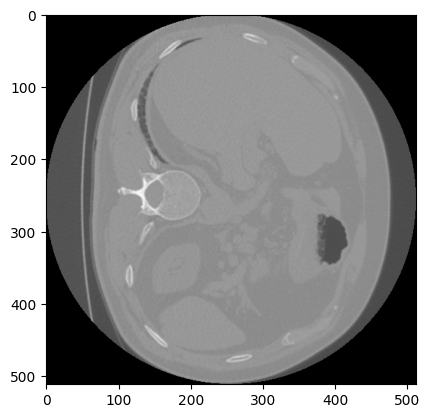

In [ ]:
one_slice = ct_0[0][0][:, :, 4] 
plt.imshow(one_slice, cmap="grey") # 512 x 512

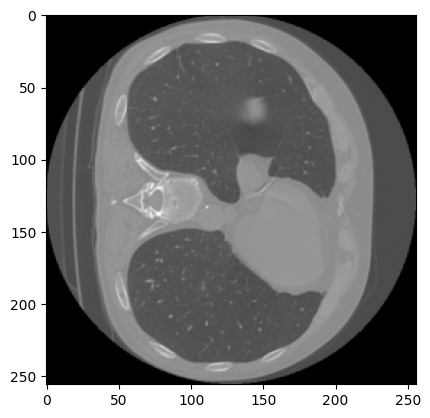

In [6]:
one_slice = ct_0[0][1][5]
plt.imshow(one_slice, cmap="grey") # 256 x 256

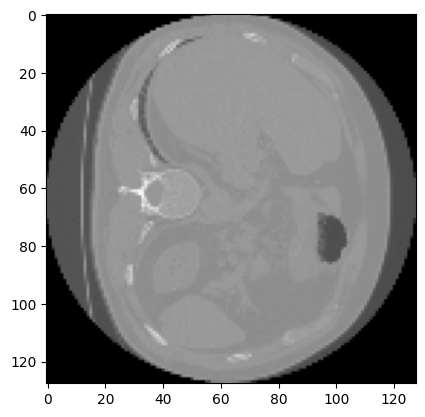

In [54]:
one_slice = ct_0[0][0][:, :, 4] 
plt.imshow(one_slice, cmap="grey") # 128 x 128

In [ ]:
ct_1 = gz_data_unpacking(CT_1, 1, size=(256, 256), stop_iter=70) # патология будет равна 1

Processing study_0255.nii.gz...
Processing study_0256.nii.gz...
Processing study_0257.nii.gz...
Processing study_0258.nii.gz...
Processing study_0259.nii.gz...
Processing study_0260.nii.gz...
Processing study_0261.nii.gz...
Processing study_0262.nii.gz...
Processing study_0263.nii.gz...
Processing study_0264.nii.gz...
Processing study_0265.nii.gz...
Processing study_0266.nii.gz...
Processing study_0267.nii.gz...
Processing study_0268.nii.gz...
Processing study_0269.nii.gz...
Processing study_0270.nii.gz...
Processing study_0271.nii.gz...
Processing study_0272.nii.gz...
Processing study_0273.nii.gz...
Processing study_0274.nii.gz...
Processing study_0275.nii.gz...
Processing study_0276.nii.gz...
Processing study_0277.nii.gz...
Processing study_0278.nii.gz...
Processing study_0279.nii.gz...
Processing study_0280.nii.gz...
Processing study_0281.nii.gz...
Processing study_0282.nii.gz...
Processing study_0283.nii.gz...
Processing study_0284.nii.gz...
Processing study_0285.nii.gz...
Processi

In [8]:
one_item = np.array(ct_1[0][0])
print("One volume shape:", one_item.shape)
print("Dataset length:", len(ct_1[0]))
print("Labels:", ct_1[1][:3])

One volume shape: (19, 256, 256)
Dataset length: 200
Labels: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


In [39]:
ct_2 = gz_data_unpacking(CT_2, 1, size=(256, 256), stop_iter=50) # патология будет равна 1

Processing study_0939.nii.gz...


MemoryError: Unable to allocate 108. MiB for an array with shape (512, 512, 54) and data type float64

In [12]:
one_item = np.array(ct_2[0][0])
print("One volume shape:", one_item.shape)
print("Dataset length:", len(ct_2[0]))
print("Labels:", ct_2[1][:3])

One volume shape: (27, 256, 256)
Dataset length: 100
Labels: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


In [38]:
ct_3 = gz_data_unpacking(CT_3, 1, size=(256, 256), stop_iter=10) # патология будет равна 1

Processing study_1064.nii.gz...


MemoryError: Unable to allocate 90.0 MiB for an array with shape (512, 512, 45) and data type float64

In [14]:
one_item = np.array(ct_3[0][0])
print("One volume shape:", one_item.shape)
print("Dataset length:", len(ct_3[0]))
print("Labels:", ct_3[1][:3])

One volume shape: (23, 256, 256)
Dataset length: 30
Labels: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


In [15]:
ct_4 = gz_data_unpacking(CT_4, 1, size=(256, 256)) # патология будет равна 1  

Processing study_1109.nii.gz...
Processing study_1110.nii.gz...
End of operation...


In [16]:
one_item = np.array(ct_4[0][0])
print("One volume shape:", one_item.shape)
print("Dataset length:", len(ct_4[0]))
print("Labels:", ct_4[1][:3])

One volume shape: (18, 256, 256)
Dataset length: 2
Labels: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


# Создание и предобработка датасетов

Масштабирование, создание массива данных {фото, указание учителя} и разделение на выборки

In [17]:
X_pathol = [*ct_1[0], *ct_2[0], *ct_3[0], *ct_4[0]]
y_pathol = [*ct_1[1], *ct_2[1], *ct_3[1], *ct_4[1]]

X_norma = [*ct_0[0]]
y_norma = [*ct_0[1]]

In [18]:
X_all = [*X_norma, *X_pathol]
y_all = [*y_norma, *y_pathol]
print("Число томов для обучения и теста нейросети:", len(X_all))

Число томов для обучения и теста нейросети: 586


In [19]:
print(X_all[55].shape)
print(y_all[55].shape)

(22, 256, 256)
(22,)


Разделение данных и меток в отдельные переменные и нормализация

In [35]:
from sklearn.model_selection import train_test_split

indices = list(range(len(X_all)))  # 0..585
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
print("Train indices:", train_idx)
print("Test indices:", test_idx)    

X_train = [X_all[i] for i in train_idx]
y_train = [y_all[i] for i in train_idx]

X_test = [X_all[i] for i in test_idx]
y_test = [y_all[i] for i in test_idx]

Train indices: [131, 153, 77, 437, 255, 415, 184, 195, 132, 363, 75, 92, 287, 68, 15, 404, 235, 88, 480, 117, 370, 496, 33, 0, 579, 291, 336, 362, 304, 247, 22, 425, 116, 89, 259, 525, 18, 192, 311, 144, 278, 268, 529, 348, 352, 477, 456, 386, 54, 524, 46, 93, 538, 108, 335, 585, 463, 421, 305, 368, 298, 382, 245, 522, 69, 443, 530, 272, 196, 188, 244, 149, 124, 567, 450, 185, 414, 409, 440, 257, 238, 428, 354, 540, 439, 114, 203, 141, 329, 7, 536, 19, 172, 436, 56, 528, 550, 584, 561, 301, 49, 502, 25, 537, 220, 518, 411, 42, 402, 464, 431, 271, 539, 369, 154, 126, 509, 334, 467, 174, 31, 113, 23, 173, 398, 482, 57, 312, 222, 460, 24, 17, 290, 66, 296, 577, 321, 212, 559, 190, 309, 515, 265, 94, 180, 322, 319, 302, 5, 45, 494, 375, 367, 16, 48, 565, 500, 3, 444, 350, 357, 225, 26, 263, 50, 229, 37, 157, 237, 560, 175, 481, 338, 194, 486, 564, 493, 67, 310, 168, 545, 495, 193, 152, 318, 328, 469, 355, 103, 513, 74, 407, 563, 119, 374, 395, 465, 207, 346, 393, 332, 390, 505, 365, 36, 13

In [36]:
# Train
X_train_slices = np.concatenate(X_train, axis=0)  # форма (sum(num_slices_train), 256, 256)
y_train_slices = np.concatenate(y_train, axis=0)  # форма (sum(num_slices_train),)

X_train_slices = X_train_slices[..., np.newaxis]  #
y_train_slices  = y_train_slices[..., np.newaxis]

# Test
X_test_slices = np.concatenate(X_test, axis=0)
y_test_slices = np.concatenate(y_test, axis=0)

X_test_slices = X_test_slices[..., np.newaxis]  
y_test_slices  = y_test_slices[..., np.newaxis]

print(X_train_slices.shape, y_train_slices.shape)
print(X_test_slices.shape, y_test_slices.shape)

MemoryError: Unable to allocate 2.43 GiB for an array with shape (9941, 256, 256) and data type float32

# Создание модели, её компиляция и обучение

Обучение нейронной сети

In [22]:
# создание модели
INPUT_SHAPE = X_train_slices.shape
print("Input dimensions: ", INPUT_SHAPE) # размер входа

model = Sequential([
    keras.Input(shape=INPUT_SHAPE),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# компиляция модели
model.compile( optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
	metrics=['accuracy'])

# вывод структуры модели
model.summary()

Input dimensions:  (9941, 256, 256)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 9941, 256, 8)   │        18,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4970, 128, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4970, 128, 16)  │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2485, 64, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2485, 64, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1242, 32, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1242, 32, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,370 (99.10 KB)

 Trainable params: 25,370 (99.10 KB)

 Non-trainable params: 0 (0.00 B)

Визуализация результатов

In [23]:
import torch

print(torch.version.cuda)       # версия CUDA, с которой собран PyTorch
print(torch.backends.cudnn.version())  # версия cuDNN

if torch.cuda.is_available():
    print("CUDA доступна! Используется устройство:", torch.cuda.get_device_name(0))
else:
    print("CUDA недоступна. Используется CPU.")

12.6
91002
CUDA доступна! Используется устройство: NVIDIA GeForce RTX 4060


In [25]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используем устройство:", device)

Используем устройство: cuda


In [29]:
X_train_tensor = torch.tensor(X_train_slices, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_slices, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test_slices, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_slices, dtype=torch.long).to(device)

In [33]:
X_train_np = X_train_tensor.cpu().numpy()
y_train_np = y_train_tensor.cpu().numpy()

X_test_np = X_test_tensor.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

RuntimeError: [enforce fail at alloc_cpu.cpp:121] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2605973504 bytes.

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # метрика, за которой следим
    patience=5,           # количество эпох без улучшения, после которых остановка
    restore_best_weights=True  # вернуть веса лучшей эпохи
)

In [ ]:
EPOCHS = 25
BATCH = 32
# обучаем модель
history = model.fit(X_train_np, # примеры входа
                    y_train_np, # указания учителя
                    batch_size = BATCH, # размер пакета
                    epochs = EPOCHS, # количество эпох
                    callbacks=[early_stop],
                    validation_data=(X_test_np, y_test_np)) #  данные для проверки

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0) # проверяем на обучаюхих данных
loss1, accuracy1 = model.evaluate(X_test, y_test, verbose=0) # проверяем на тестовых данных
print('Train accuracy:', round(accuracy, 4))
print('Test accuracy:', round(accuracy1, 4))
print('Train loss:', round(loss, 4))
print('Test loss:', round(loss1, 4))
y_pred = model.predict(X_train)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

Train accuracy: 0.7
Test accuracy: 0.8
Train loss: 0.6343
Test loss: 0.582
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


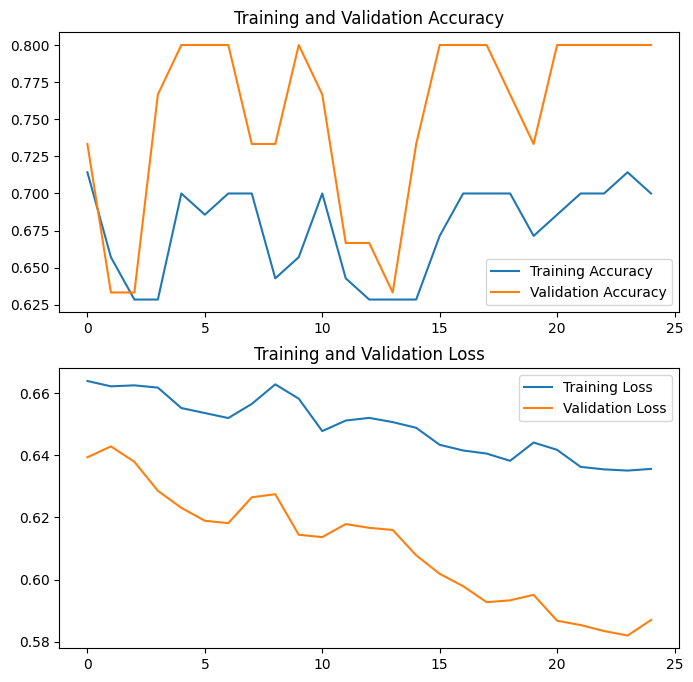

In [ ]:
# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Сохранение архитектуры модели (файл .h5)

In [ ]:
model_file_name_and_path = "ModelBrainTumorsClassificationImage2.h5"  # name file model
model.save(model_file_name_and_path)  # save model